<a href="https://colab.research.google.com/github/semant/MachineLearning/blob/master/kNN_RegimeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning: Classifying Data into Clusters
### Using sklearn's k Nearest Neighbors

> Semant Jain, PhD
> semant@gmail.com

### Executive Summary
> While trading on the capital markets, having bullish, bearish, or consolidation regime clarity is fundamental to a high win ratio. As even a highly experienced trader can only monitor three to six markets concurrently, having machine learning algorithms assist in this task would enable concurrently scanning of thousands of markets. As this analysis is protected by Non Disclosure Agreement, proficiency in the machine learning algorithms used is demonstrated in this project through use of a public dataset.
> This project consisted of three parts:
> + Initial data visualization
> + Optimizing number of neighbors while maintaing default train/test split
> + Optimizing train/test split while using optimized number of neighbors

> **Conclusion:**
> This analysis revealed the input data to have 4-D shape. Using seven nearest neighbors and a training/test split of 75%/25%, the training and testing accuracy was found to be 98.21% and 97.37% respectively.

### Python libraries used:
+ Matplotlib
+ Numpy
+ Sklearn

# 1. Setting up

### Importing libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Importing data

In [0]:
iris_dataset = load_iris()
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### 2.1. Study 1
+ Default train/test split
+ Varying neighbors

**Train/Test split: Default**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'])
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

**Basic data visualization**

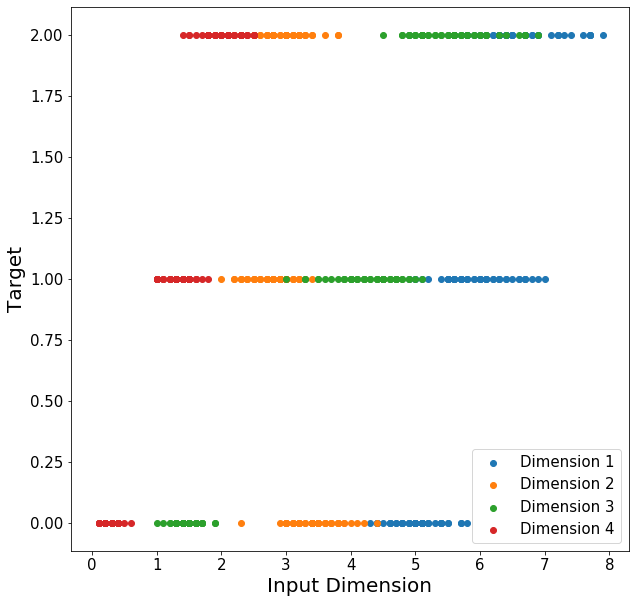

In [0]:
plt.figure(figsize = (10,10))
plt.scatter(iris_dataset['data'][:,0], iris_dataset['target'], label = 'Dimension 1')
plt.scatter(iris_dataset['data'][:,1], iris_dataset['target'], label = 'Dimension 2')
plt.scatter(iris_dataset['data'][:,2], iris_dataset['target'], label = 'Dimension 3')
plt.scatter(iris_dataset['data'][:,3], iris_dataset['target'], label = 'Dimension 4')
plt.legend(fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Input Dimension", fontsize = 20)
plt.ylabel("Target", fontsize = 20)
plt.savefig("CE_ML_Project_07_kNN_01.jpeg")
plt.show()

# 2. Model Fits

**Varying number of neighbors**

In [0]:
ans_nei_1 = []
ans_nei_2 = []
ans_nei_3 = []
#ans_nei_4 = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    score_train = knn.score(X_train, y_train)
    score_test  = knn.score(X_test, y_test)
    score_tr_test = (score_train**2 + score_test**2 ) ** 0.5
    print(f"Neighbors {i}: ", round(score_train,4), "  ", round(score_test,4)) #, "  ", round(score_tr_test,4))
    ans_nei_1.append(i)
    ans_nei_2.append(score_train)
    ans_nei_3.append(score_test)
    ans_nei_4.append(score_tr_test)

Neighbors 1:  1.0    0.8963
Neighbors 2:  0.9333    0.7926
Neighbors 3:  0.9333    0.8
Neighbors 4:  0.9333    0.7407
Neighbors 5:  0.9333    0.7481
Neighbors 6:  0.8    0.6519
Neighbors 7:  0.8    0.6519
Neighbors 8:  0.8    0.6519
Neighbors 9:  0.5333    0.3111


**Visualization**

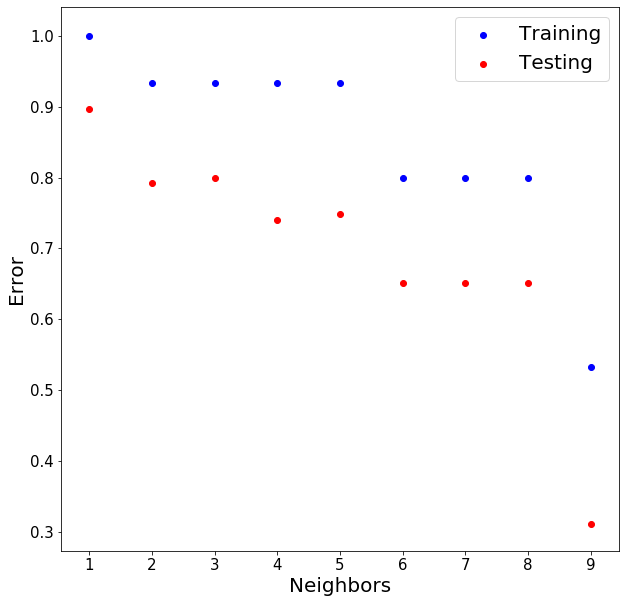

In [0]:
plt.figure(figsize = (10,10))
plt.scatter(ans_nei_1, ans_nei_2, c = 'b', label = 'Training'  )
plt.scatter(ans_nei_1, ans_nei_3, c = 'r', label = 'Testing')
#plt.scatter(ans_nei_1, ans_nei_4, c = 'g', label = 'Train+Test')
plt.legend(fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Neighbors", fontsize = 20)
plt.ylabel("Error", fontsize = 20)
plt.savefig("CE_ML_Project_07_kNN_02.jpeg")
plt.show()

### 2.2. Study 2
+ Fixed neighbors
+ Varying train/test split

In [0]:
ans_spl_1 = []
ans_spl_2 = []
ans_spl_3 = []

for i in np.arange(0.1, 0.95, 0.05):
    i = round(i, 2)
    X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size = i)
    knn = KNeighborsClassifier(n_neighbors = 7)
    knn.fit(X_train, y_train)
    score_train = knn.score(X_train, y_train)
    score_test  = knn.score(X_test, y_test)
    print(f"Train size {round(1-i,2)}: ", round(score_train,4), round(score_test,4))
#    print(f"Train size {round(1-i,2)}: ", round(knn.score(X_train, y_train),4), "  ", round(knn.score(X_test, y_test),4))
    ans_spl_1.append(1-i)
    ans_spl_2.append(score_train)
    ans_spl_3.append(score_test)

Train size 0.9:  0.9704 1.0
Train size 0.85:  0.9685 1.0
Train size 0.8:  0.975 0.9667
Train size 0.75:  0.9821 0.9737
Train size 0.7:  0.9714 0.9778
Train size 0.65:  1.0 0.9434
Train size 0.6:  0.9778 0.9833
Train size 0.55:  0.9634 0.9706
Train size 0.5:  0.9867 0.9467
Train size 0.45:  0.9851 0.9639
Train size 0.4:  0.9833 0.9444
Train size 0.35:  0.9808 0.9796
Train size 0.3:  0.9556 0.981
Train size 0.25:  0.9459 0.9292
Train size 0.2:  0.9667 0.9833
Train size 0.15:  1.0 0.8516
Train size 0.1:  0.8 0.6519


**Visualization**

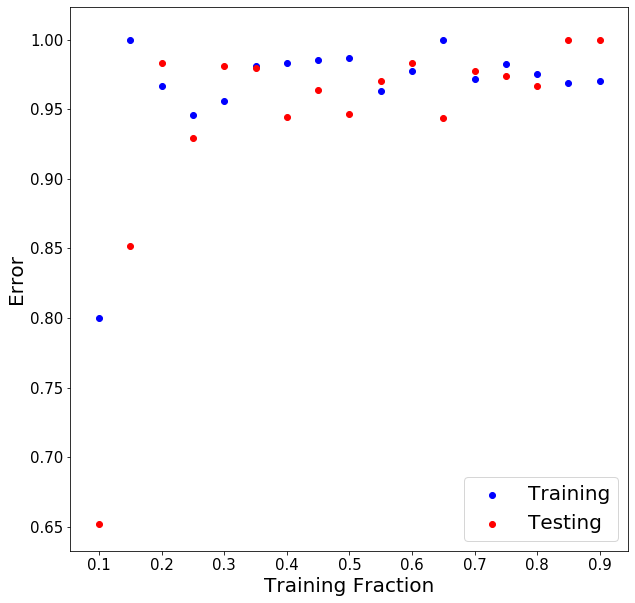

In [0]:
plt.figure(figsize = (10,10))
plt.scatter(ans_spl_1, ans_spl_2, c = 'b', label = 'Training'  )
plt.scatter(ans_spl_1, ans_spl_3, c = 'r', label = 'Testing')
plt.legend(fontsize = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Training Fraction", fontsize = 20)
plt.ylabel("Error", fontsize = 20)
plt.savefig("CE_ML_Project_07_kNN_03.jpeg")
plt.show()